In [136]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from tensorflow import keras
# print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [137]:
iris = pd.read_csv('dataset/iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [138]:
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
print(X.shape, y.shape)

(150, 4) (150,)


In [139]:
# Get unique target values
categoreis= np.unique(y)
categoreis
# y = keras.utils.to_categorical(y)

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [140]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform
encoded_labels = encoder.fit_transform(y)

#Output 
encoded_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [141]:
y = keras.utils.to_categorical(encoded_labels)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [142]:
y.shape

(150, 3)

In [143]:
#Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=9, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [144]:
X_train.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
4,5.0,3.6,1.4,0.2
36,5.5,3.5,1.3,0.2
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
86,6.7,3.1,4.7,1.5
97,6.2,2.9,4.3,1.3
73,6.1,2.8,4.7,1.2
40,5.0,3.5,1.3,0.3
79,5.7,2.6,3.5,1.0
0,5.1,3.5,1.4,0.2


In [145]:
X_test.sample(10)

,sepal.length,sepal.width,petal.length,petal.width
21,5.1,3.7,1.5,0.4
18,5.7,3.8,1.7,0.3
38,4.4,3.0,1.3,0.2
29,4.7,3.2,1.6,0.2
50,7.0,3.2,4.7,1.4
88,5.6,3.0,4.1,1.3
77,6.7,3.0,5.0,1.7
65,6.7,3.1,4.4,1.4
46,5.1,3.8,1.6,0.2
84,5.4,3.0,4.5,1.5


# Scaling data by Standardad Scaler 

In [146]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [150]:
X_train[1]

array([0.68625788, 0.1128703 , 0.99937683, 0.79369554])

In [151]:
X_test[1]


array([-1.43589658,  1.40961448, -1.56657226, -1.32110964])

# Build the model

In [153]:
#Define a model 
model = Sequential()

# Add the first hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',input_shape=(4,)))# Replace 4 with the number of input features number of 3 plus 1 (3+1)

# Add the second hidden layer with 10 neurons and 'relu' activation
model.add(Dense(10, activation='relu',))

#Add a Dropuot layer with a rate of 0.5
model.add(Dropout(0.5))

#Add the output layer with 'softmax' activation
model.add(Dense(3, activation='softmax')) # Replace 3 with the number of classes

In [154]:
# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)

# Compile model 
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])


In [155]:
# Display the model summary
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Model the Fit
train_model = model.fit(X_train, y_train, batch_size=5, epochs=200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3646 - loss: 1.4031
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3519 - loss: 1.2647
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4200 - loss: 1.2149
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4029 - loss: 1.1700
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 1.0725
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5124 - loss: 0.9815
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 0.9078
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5705 - loss: 0.8720
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5307 - loss: 0.8400
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6207 - loss: 0.7356
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5889 - loss: 0.7498
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [157]:
# Access the keys of the history object
print(train_model.history.keys())

dict_keys(['accuracy', 'loss'])


In [170]:
print('Accuracy:', np.max(train_model.history['accuracy']))

print('Loss:',np.max(train_model.history['loss']))


Accuracy: 0.9916666746139526
Loss: 1.3543505668640137


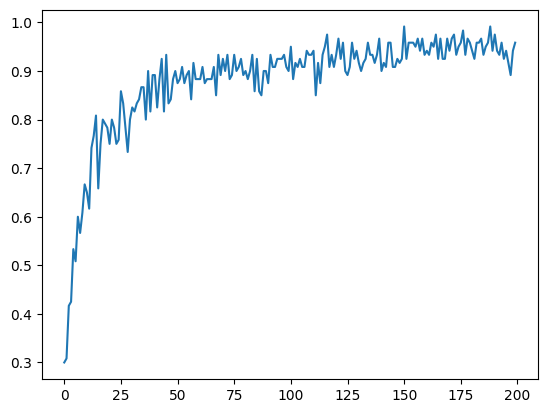

In [167]:
# Plot 
plt.plot(train_model.history['accuracy'])

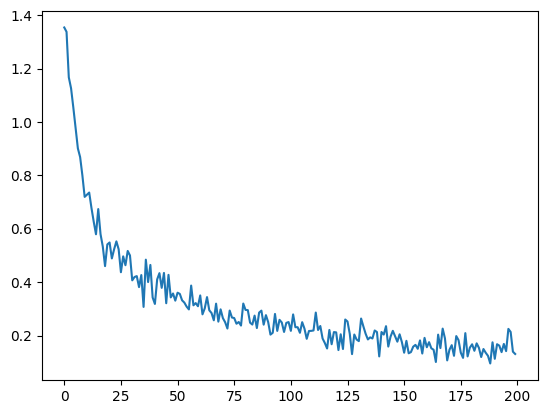

In [168]:
plt.plot(train_model.history['loss'])